In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
!pip install xgboost
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

import warnings 
warnings.filterwarnings('ignore')


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ------------------------------------

In [2]:
data=pd.read_csv("C:\\Users\\toshiba\\Documents\\Olabike.csv")

In [4]:
data


,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
data.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
data.shape

(731, 16)

In [9]:
data.describe()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
parts = data["datetime"].str.split(" ", n=2, expand=True) 
data["date"] = parts[0] 
data["time"] = parts[1].str[:2].astype('int') 
data.head() 


KeyError: 1

In [ ]:
parts = data["date"].str.split("-", n=3, expand=True) 
data["day"] = parts[0].astype('int') 
data["month"] = parts[1].astype('int') 
data["year"] = parts[2].astype('int') 
data.head() 


In [ ]:
from datetime import datetime 
import calendar 


def weekend_or_weekday(year, month, day): 
d = datetime(year, month, day) 
  if d.weekday() > 4: 
    return 0
   else: 
    return 1


data['weekday'] = data.apply(lambda x: 
           weekend_or_weekday(x['year'], 
                x['month'],
                        x['day']), 
                             axis=1) 
data.head() 


In [ ]:
def am_or_pm(x): 
  if x > 11: 
   return 1
  else: 
 return 0


df['am_or_pm'] = df['time'].apply(am_or_pm) 
df.head() 


In [17]:
from datetime import date 
import holidays 


def is_holiday(x): 

    india_holidays = holidays.country_holidays('IN') 

if india_holidays.get(x): 
    return 1
else: 
    return 0


data['holidays'] = data['date'].apply(is_holiday) 
data.head() 


ModuleNotFoundError: No module named 'holidays'

In [19]:
data.isnull().sum()


instant       0
datetime      0
season        0
year          0
month         0
holidays      0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

KeyError: 'day'

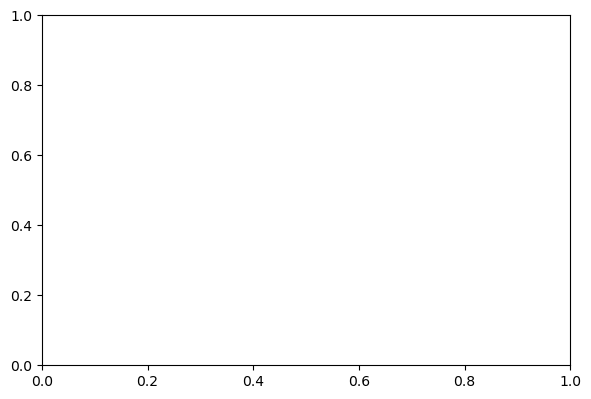

In [20]:
features = ['day', 'time', 'month'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    data.groupby(col).mean()['count'].plot() 
plt.show() 


TypeError: Could not convert 01-01-201102-01-201103-01-201104-01-201105-01-201106-01-201107-01-201108-01-201109-01-201110-01-201111-01-201112-01-201113-01-201114-01-201115-01-201116-01-201117-01-201118-01-201119-01-201120-01-201121-01-201122-01-201123-01-201124-01-201125-01-201126-01-201127-01-201128-01-201129-01-201130-01-201131-01-201101-02-201102-02-201103-02-201104-02-201105-02-201106-02-201107-02-201108-02-201109-02-201110-02-201111-02-201112-02-201113-02-201114-02-201115-02-201116-02-201117-02-201118-02-201119-02-201120-02-201121-02-201122-02-201123-02-201124-02-201125-02-201126-02-201127-02-201128-02-201101-03-201102-03-201103-03-201104-03-201105-03-201106-03-201107-03-201108-03-201109-03-201110-03-201111-03-201112-03-201113-03-201114-03-201115-03-201116-03-201117-03-201118-03-201119-03-201120-03-201121-12-201122-12-201123-12-201124-12-201125-12-201126-12-201127-12-201128-12-201129-12-201130-12-201131-12-201101-01-201202-01-201203-01-201204-01-201205-01-201206-01-201207-01-201208-01-201209-01-201210-01-201211-01-201212-01-201213-01-201214-01-201215-01-201216-01-201217-01-201218-01-201219-01-201220-01-201221-01-201222-01-201223-01-201224-01-201225-01-201226-01-201227-01-201228-01-201229-01-201230-01-201231-01-201201-02-201202-02-201203-02-201204-02-201205-02-201206-02-201207-02-201208-02-201209-02-201210-02-201211-02-201212-02-201213-02-201214-02-201215-02-201216-02-201217-02-201218-02-201219-02-201220-02-201221-02-201222-02-201223-02-201224-02-201225-02-201226-02-201227-02-201228-02-201229-02-201201-03-201202-03-201203-03-201204-03-201205-03-201206-03-201207-03-201208-03-201209-03-201210-03-201211-03-201212-03-201213-03-201214-03-201215-03-201216-03-201217-03-201218-03-201219-03-201220-03-201221-12-201222-12-201223-12-201224-12-201225-12-201226-12-201227-12-201228-12-201229-12-201230-12-201231-12-2012 to numeric

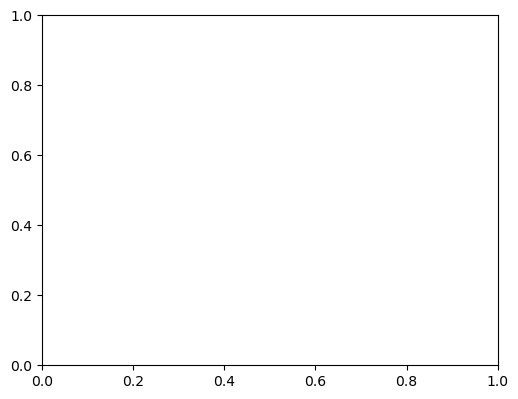

In [25]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'weekday'] 

plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    data.groupby(col).mean()['count'].plot.bar() 
plt.show() 


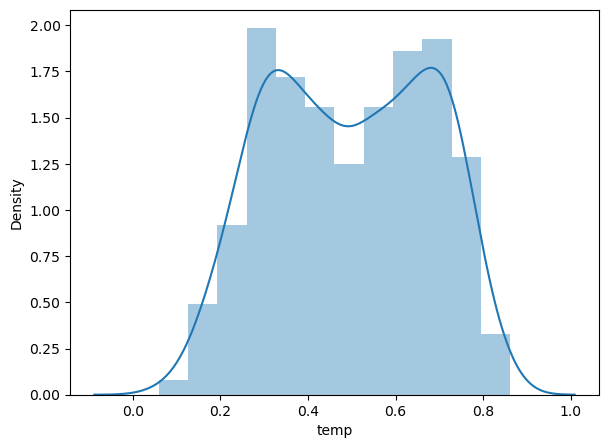

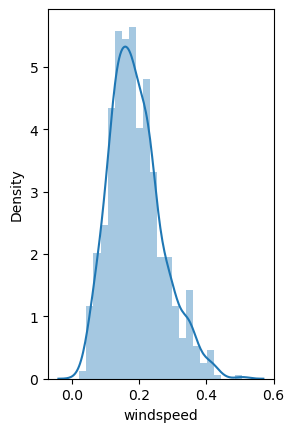

In [30]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
 plt.subplot(1, 2, i + 1) 
 sb.distplot(data[col]) 
 plt.show()


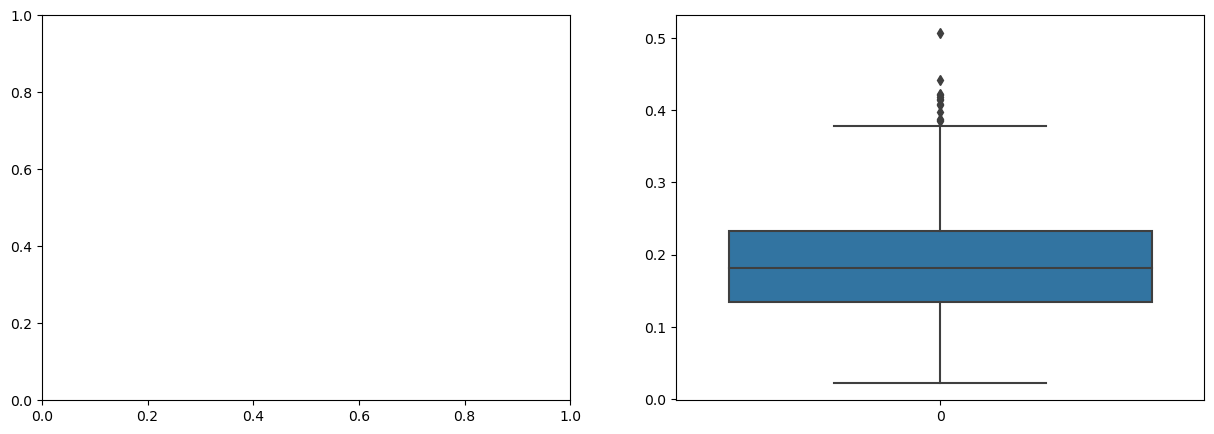

In [31]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
 plt.subplot(1, 2, i + 1) 
sb.boxplot(data[col]) 
plt.show()


In [34]:
num_rows = data.shape[0] - data[data['windspeed']<32].shape[0] 
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 0.


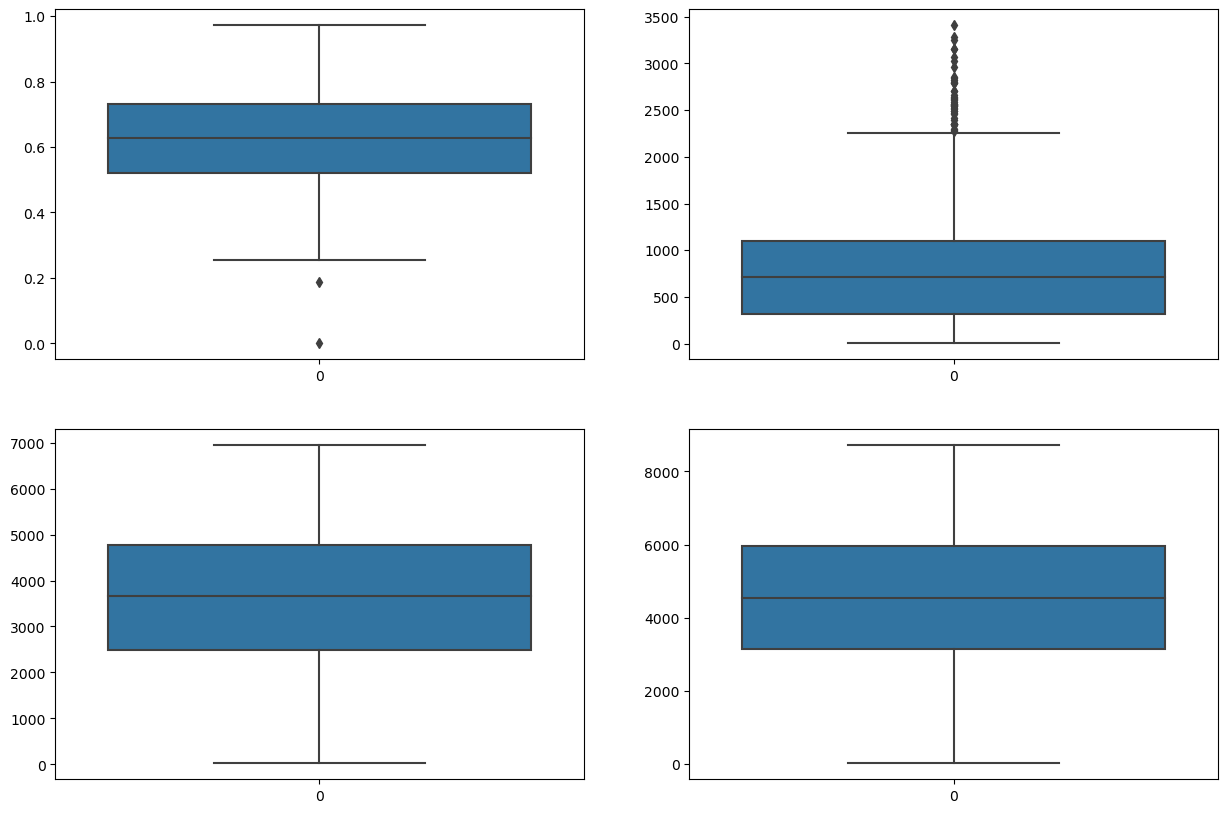

In [36]:
features = ['humidity', 'casual', 'registered', 'count'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(data[col]) 
plt.show() 


In [37]:
sb.heatmap(data.corr() > 0.8, 
   annot=True, 
           cbar=False) 
plt.show()


ValueError: could not convert string to float: '01-01-2011'

In [38]:
data.drop(['registered', 'time'], axis=1, inplace=True) 
data = data[(data['windspeed'] < 32) & (data['humidity'] > 0)]


KeyError: "['time'] not found in axis"

In [40]:
features = data.drop(['count'], axis=1) 
target = data['count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, 
                                                  target, 
                                                  test_size = 0.1, 
                                                  random_state=22) 
X_train.shape, X_val.shape


((657, 16), (74, 16))

In [41]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 


ValueError: could not convert string to float: '22-01-2011'

In [42]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), XGBRegressor(), Lasso(), 
          RandomForestRegressor(), Ridge()] 

for i in range(5): 
    models[i].fit(X_train, Y_train) 

    print(f'{models[i]} : ') 

    train_preds = models[i].predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 

    val_preds = models[i].predict(X_val) 
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print() 


ValueError: could not convert string to float: '22-01-2011'